In [77]:
import numpy as np
import matplotlib . pyplot as plt
from scipy import integrate

In [78]:

# x = np. linspace ( -5 , 5 , 200) # define grid
# y = np.sin(x)
# plt . plot (x, y)
# plt . show ()

![image.png](attachment:image.png)

In [79]:
def second_derivate(x:np.array,f:np.array):
    f_p1 = f[1:]
    
    f_m1 = f[:-1]
    f_p1 = np.append(f_p1,0)
    f_m1 = np.insert(f_m1, 0,0)
    delta_x = x[1] - x[0]

    # De sidste 2 punkter kan vi ikke lave derivatives på.
    f_dubble = (f_p1 - 2*f + f_m1)/(delta_x**2)

    f_dubble = f_dubble[1:-1]
    x = x[1:-1]
    return (x,f_dubble)

def first_derivative(x,f):
    f_1 = f[1::]
    f_1 = np.append(f_1,0)
    delta_x = x[1] - x[0]
    f_single = (f_1 - f)/delta_x
    return f_single

#second_derivate(x,y)

#plt.plot(x,y)

# x,f_prim = second_derivate(x,y)
# y = np.sin(x)
# plt.plot(x,y)
# plt.plot(x,f_prim)

# #plt.xlim(-4,4)
# #plt.ylim(-1.1,1.1)
# plt.show()


In [80]:
# The hamiltonian.
# using the new definitions
def kinetic(x:np.array):
    H = np.zeros([x.shape[0], x.shape[0]])
    delta_x = x[1] - x[0]
    for i in range(x.shape[0]):
        for j in range(x.shape[0]):
            if i == j:
                H[i,j] = -2
            if i == j + 1 or  j == i + 1:
                H[i,j] = 1
    return -1/2*H/(delta_x**2)

def potential(x:np.array)->np.array:
    V = np.zeros([x.shape[0], x.shape[0]])
    # for i in range(x.shape[0]):
    #     for j in range(x.shape[0]):
    #         if i == j:
    x_sq_vec = np.square(x)/2  
          #"""Should there or should there not be divided by deltax""" or not, let it be here for now /delta_x
    x_sq = np.diag(x_sq_vec)         # I think no, since the delta x came from the fact that the matrix for T should works as the derivative, here we basically have
    #print(x_sq)                #(A_i)*x_i = x_i^2 where there is no h^2 in denominator 

    return x_sq, x_sq_vec
# plt.plot(x,potential(x))
# kinetic(x)


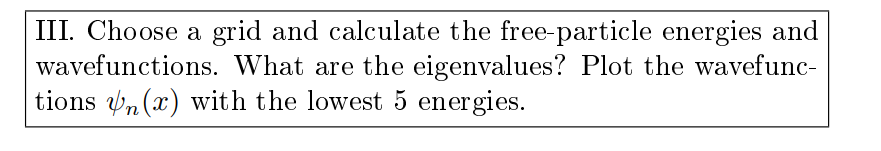

[0.03359019 0.13435255 0.30226247 0.53727894 0.83934453]
(200,)
(200,)


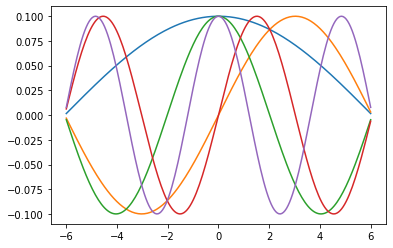

In [81]:

x = np. linspace ( -6 , 6 , 200)
epsilon_n,psi_gn = np.linalg.eigh(kinetic(x))
print(epsilon_n[0:5])
print(x.shape)
print(psi_gn[:,0].shape)
for i in [0,1,2,3,4]:
    plt.plot(x, psi_gn[:,i])

[0.49988634 1.4994316  2.49852186 3.49715681 4.49533613]
(200,)
(200,)


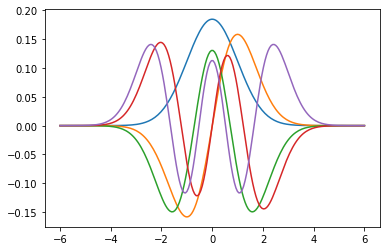

In [82]:

x = np. linspace ( -6 , 6 , 200)
pot, pot_vec = potential(x)
epsilon_n,psi_gn = np.linalg.eigh(kinetic(x)+pot)
print(epsilon_n[0:5])
print(x.shape)
print(psi_gn[:,0].shape)
for i in [0,1,2,3,4]:
    
    plt.plot(x, psi_gn[:,i])

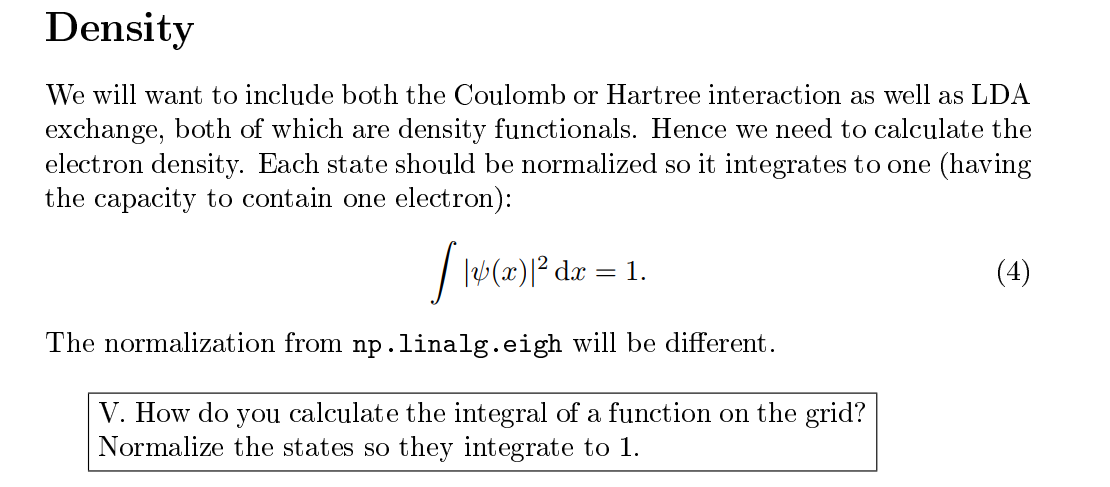

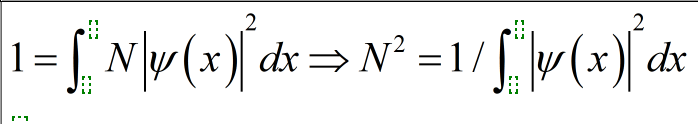

In [83]:
# We integrate the function and normalize with that.
def integrate_function(x,func):
    return integrate.simpson(y=func, x=x)

def get_normalization_for_wavefunction(x,psi):
    psi_sq = psi * np.conj(psi)
    delta_x  = x[1] - x[0]
    N_sq = integrate_function(x = x,func = psi_sq)
    N = np.sqrt(N_sq)
    return N

def Normalize_wave_function(x, psi):
    N = get_normalization_for_wavefunction(x,psi)
    psi_norm = psi/N
    return psi_norm

def normalize_wave_functions(x, psi_gn):
    num_of_wave_funcs = psi_gn.shape[1]
    norm_psi_array = np.empty(psi_gn.shape)
    for i in range(num_of_wave_funcs):
        norm_psi_array[:,i] = Normalize_wave_function(x=x, psi = psi_gn[:,i])
        #print(f'Norm check i = {i}, norm =  {get_normalization_for_wavefunction(x = x,psi =Normalize_wave_function(x = x,psi = norm_psi_array[:,i]))}')
    return norm_psi_array            
    



In [84]:
for i in [0,1,2,3,4]:
    print(get_normalization_for_wavefunction(x,psi_gn[:,i]))
    print(get_normalization_for_wavefunction(x, Normalize_wave_function(x,psi_gn[:,i])))

print(psi_gn.shape)
    

0.24556365272101738
1.0
0.24556365272101743
1.0
0.24556365272101718
0.9999999999999999
0.24556365272101183
1.0
0.24556365272092998
0.9999999999999999
(200, 200)


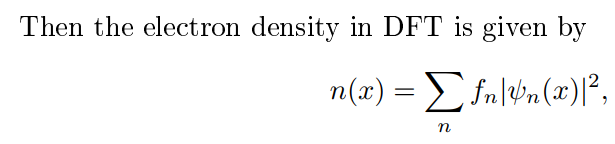   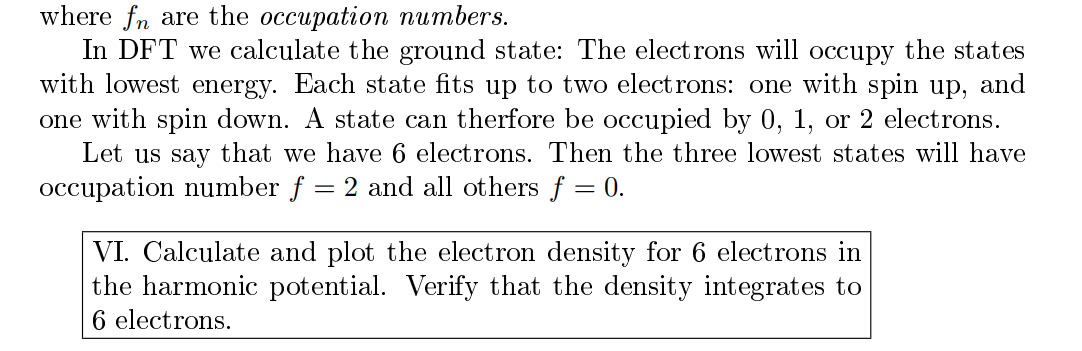


In [85]:
#Mapping
# n = 0 => 2
# n = 1 => 2
# En sum som hedder 2,2,2,1, 0
import math as math

def Calculate_electron_density(psi_xn, x):
    num_electrons = psi_xn.shape[1]
    remaining_electrons = num_electrons
    dens = 0
    n = 0

    while remaining_electrons > 0:
        
        psi_n = psi_xn[:,n] * np.conj([psi_xn[:,n]]) # this normalizes 
        # print(f'integral of psi_n {integrate_function(x = x, func=psi_n)}')
        # print(f'remaining_electrons {remaining_electrons}')
        if remaining_electrons >=2 :
            dens += 2*psi_n
            remaining_electrons -= 2
        if remaining_electrons == 1:
            dens += 1*psi_n
            remaining_electrons -= 1
        n += 1

    return dens

def calculate_exchange(dens,x):
    # psi is not considered normalized
    # and we expect a psi_gn, such that we can
    #norm_psi = normalize_wave_functions(x=x, psi_gn=psi_gn)
    #print(f'norm_psi.shape {norm_psi.shape}')
    n = dens
    #n = Calculate_electron_density(psi_xn=norm_psi, x = x)
    pot_vec = - (3/math.pi)**(1/3) * np.power(n, 1/3) # this is expected to have one dimensional it applies
    E = - 3/4*(3/math.pi)**(1/3) * integrate.simpson(y = np.power(n, 4/3), x=x)
    #print(f'pot_shape:{pot.shape}')
    # Reshape so we have a potential as a matrix
    pot = np.diag(pot_vec)
    return E, pot, pot_vec
    

psi_test = psi_gn[:,0:6]

norm_psi_test = normalize_wave_functions(x=x, psi_gn=psi_test)
print(f'integral {get_normalization_for_wavefunction(x=x, psi=norm_psi_test[:,0])}')
print(f"simps without int {integrate.simpson(y=norm_psi_test[:,0]*norm_psi_test[:,0])}")
print(f"inte: {integrate_function(x=x, func=norm_psi_test[:,0]*norm_psi_test[:,0])}")
# print(f'integral {get_normalization_for_wavefunction(x=x, psi=norm_psi_test[:,1])}')
# print(f'integral {get_normalization_for_wavefunction(x=x, psi=norm_psi_test[:,2])}')
# print(f'integral {get_normalization_for_wavefunction(x=x, psi=norm_psi_test[:,3])}')
density = Calculate_electron_density(norm_psi_test, x=x)
exchange_pot_and_E = calculate_exchange(dens=density,x=x)
exchange_E = exchange_pot_and_E[0][0]
exchange_pot = exchange_pot_and_E[1][0]


#print(exchange_E)
#print()
#print(x.shape, dens_func.shape)
#num_electrons = integrate_function(x=x,func=dens_func)
#print(num_electrons) #And so it is normalized correctly.
#calculate_exchange(x=x,psi_gn=psi_test)


integral 1.0
simps without int 16.583333333333336
inte: 1.0


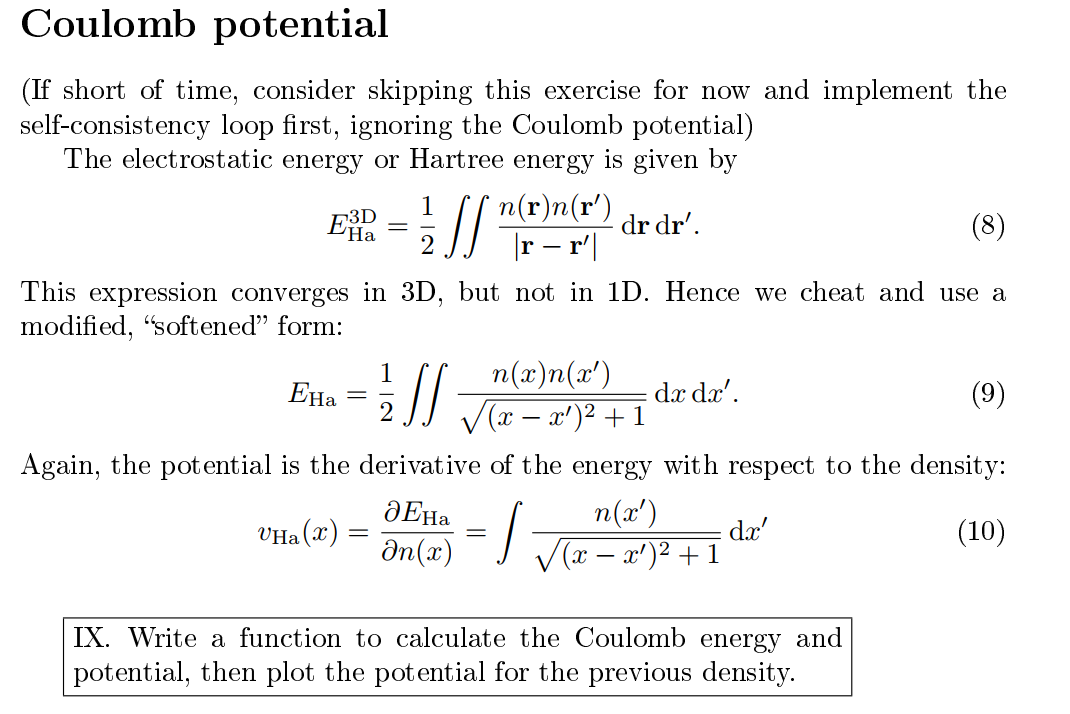

In [86]:
def calculate_coulumb_energy_and_potential(x, dens):
    # x is one axis and xprime is another.

    matrix = np.empty([dens.shape[1], dens.shape[1]])
    #print(dens)
    for i in range(dens.shape[1]):
        for j in range(dens.shape[1]):
            matrix[i,j] = dens[0][i]*dens[0][j]/math.sqrt((x[i] - x[j])**2 + 1)
    E_Ha = 1/2 * integrate.simpson(integrate.simpson(y=matrix,x=x, axis=0),x=x,axis=0)

    # coulumb matrix
    matrix = np.empty([dens.shape[1], dens.shape[1]])
    for i in range(dens.shape[1]):
        for j in range(dens.shape[1]):
            matrix[i,j] = dens[0][j]/math.sqrt((x[i] - x[j])**2 + 1)
    v_ha_vec = 1/2 * integrate.simpson(y=matrix,x=x, axis = 1)
    v_ha = np.diag(v_ha_vec)
    return E_Ha, v_ha, v_ha_vec #check hvilken vej vi burde inte 
    """i ais is the the row axis, whereas j axis is the colums, so we should integrate over columns """
    # need to scipy integrate also
    


#psi_test = psi_gn[:,0:6]
#norm_psi_test = normalize_wave_functions(x=x, psi_gn=psi_test)
#density = Calculate_electron_density(norm_psi_test, x=x)
#calculate_coulumb_energy_and_potential(x=x, dens = density)

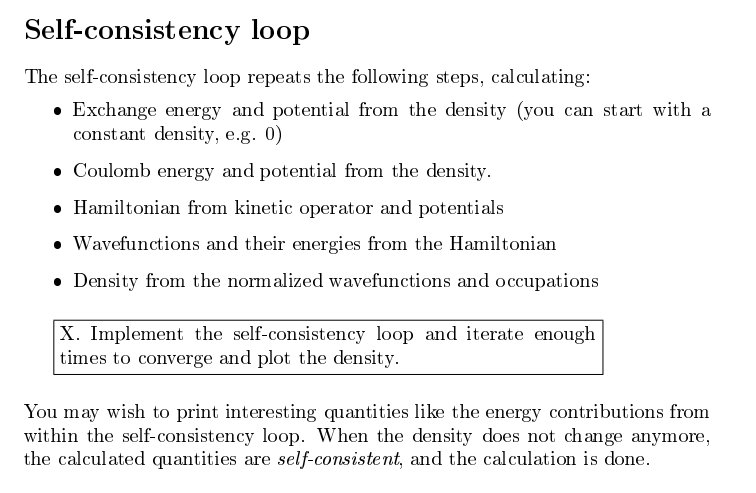

Iteration: 0, Exchange E: -0.0, Hartree/coulumb E: 11.576


<ipython-input-87-a0e507fd626f>:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


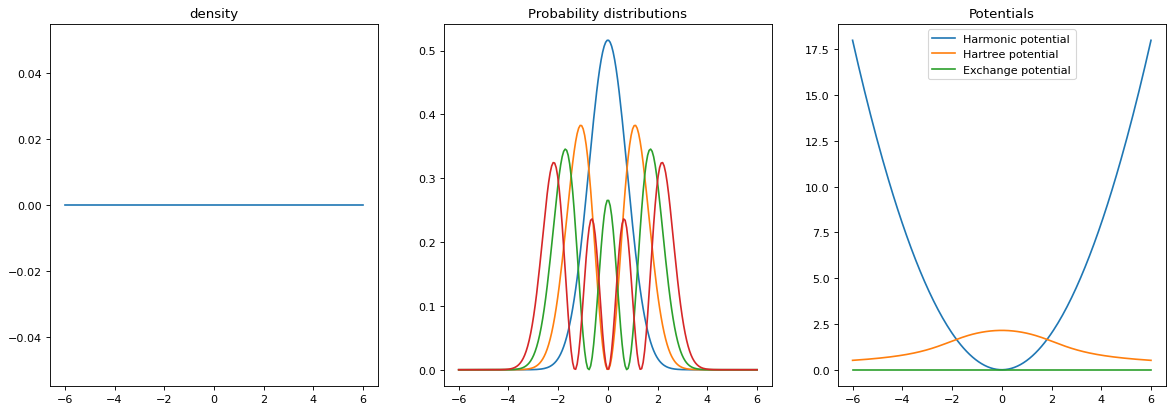

Iteration: 1, Exchange E: -2.916, Hartree/coulumb E: 11.576


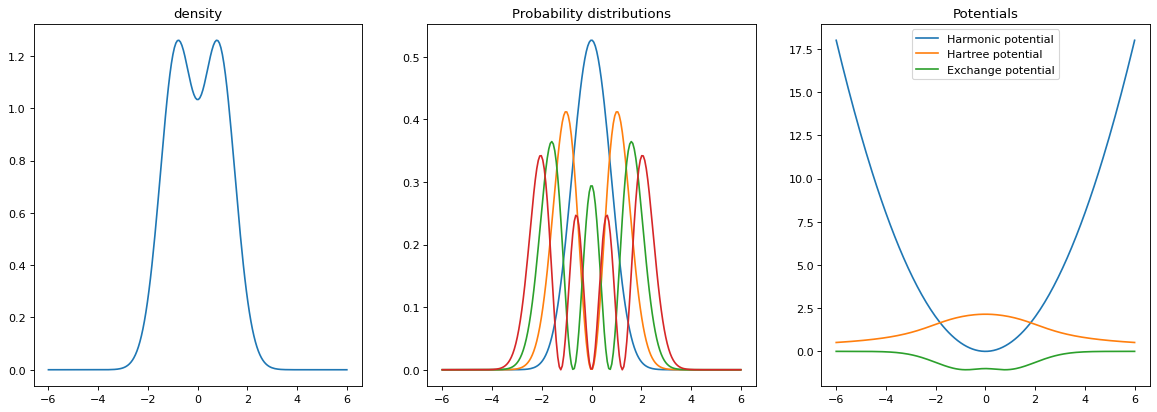

Iteration: 2, Exchange E: -2.979, Hartree/coulumb E: 11.576


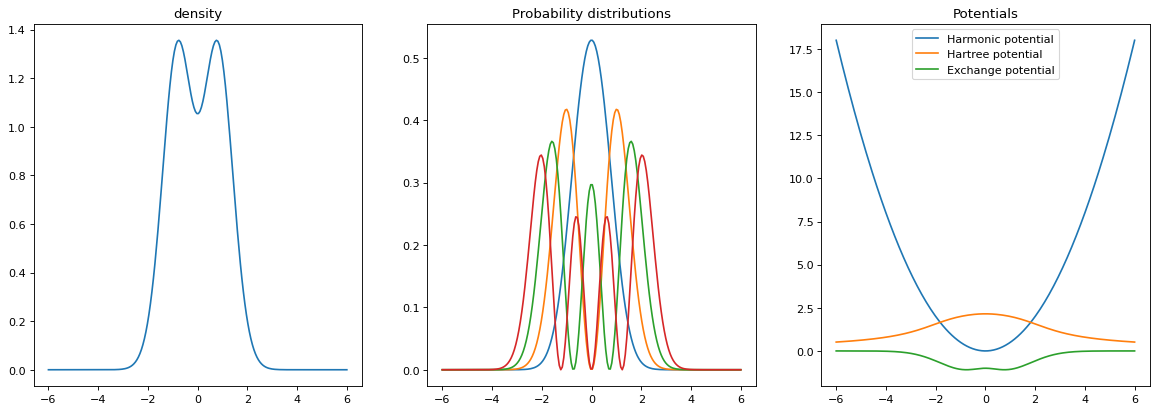

Iteration: 3, Exchange E: -2.989, Hartree/coulumb E: 11.576


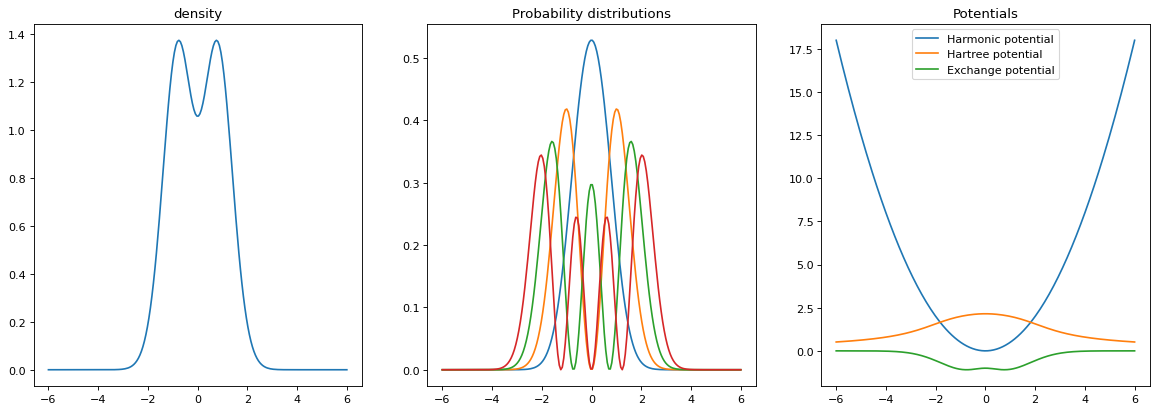

Iteration: 4, Exchange E: -2.991, Hartree/coulumb E: 11.576
Iteration: 5, Exchange E: -2.991, Hartree/coulumb E: 11.576
Iteration: 6, Exchange E: -2.991, Hartree/coulumb E: 11.576
Iteration: 7, Exchange E: -2.991, Hartree/coulumb E: 11.576
Iteration: 8, Exchange E: -2.991, Hartree/coulumb E: 11.576
Iteration: 9, Exchange E: -2.991, Hartree/coulumb E: 11.576
Iteration: 10, Exchange E: -2.991, Hartree/coulumb E: 11.576
Iteration: 11, Exchange E: -2.991, Hartree/coulumb E: 11.576
Iteration: 12, Exchange E: -2.991, Hartree/coulumb E: 11.576
Iteration: 13, Exchange E: -2.991, Hartree/coulumb E: 11.576
Iteration: 14, Exchange E: -2.991, Hartree/coulumb E: 11.576
Iteration: 15, Exchange E: -2.991, Hartree/coulumb E: 11.576
Iteration: 16, Exchange E: -2.991, Hartree/coulumb E: 11.576
Iteration: 17, Exchange E: -2.991, Hartree/coulumb E: 11.576
Iteration: 18, Exchange E: -2.991, Hartree/coulumb E: 11.576
Iteration: 19, Exchange E: -2.991, Hartree/coulumb E: 11.576
Iteration: 20, Exchange E: -2.

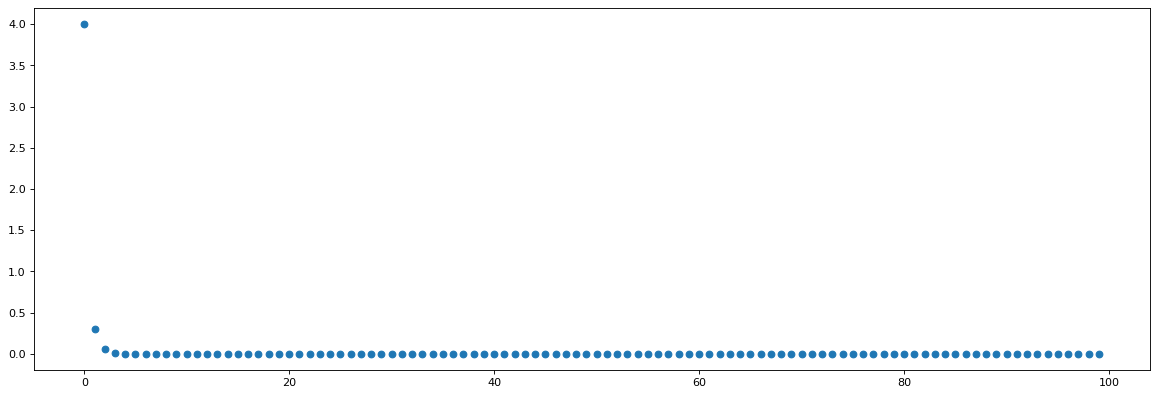

In [87]:
#self consistency loop.

grid_x = np.linspace (-6,6,200)


attemps = 100
how_many_electrons = 4

dens = 0*grid_x # init guess
variance = np.empty([attemps,1])
iter_vec = np.empty([attemps,1])
for i in range(attemps):
    old_dens = dens
    e_ex, pot_ex, pot_ex_vec = calculate_exchange(dens=dens, x=grid_x) #exchange
    e_ha, pot_ha, pot_ha_vec = calculate_coulumb_energy_and_potential(x=grid_x, dens = density) #coulomb
    harmonic_pot, harmonic_pot_vec = potential(grid_x)
    hamilton = kinetic(grid_x) + harmonic_pot + pot_ex + pot_ha # Hamilton
    epsilon_n,psi_gn = np.linalg.eigh(hamilton) #energies and wave_functions
    print(f'Iteration: {i}, Exchange E: {e_ex.round(3)}, Hartree/coulumb E: {e_ha.round(3)}')
    normalized_wave_functions = normalize_wave_functions(x=grid_x, psi_gn = psi_gn[:,0:how_many_electrons])
    
    #Plotting section
    if i in [0, 1,2,3]:
        plt.figure(figsize=(18, 6), dpi=80)
        plt.title(f"Iteration {i}")
        plt.subplot(1,3,1)
        plt.plot(grid_x, dens, label = 'dens')
        plt.title('density')
        plt.subplot(1,3,2)
        plt.title("Probability distributions")
        for j in range(how_many_electrons):
            plt.plot(grid_x, normalized_wave_functions[:,j]*normalized_wave_functions[:,j])
        
        plt.subplot(1,3,3)
        plt.title('Potentials')
        plt.plot(grid_x, harmonic_pot_vec, label = "Harmonic potential")
        plt.plot(grid_x, pot_ha_vec, label = "Hartree potential")
        plt.plot(grid_x, pot_ex_vec, label = "Exchange potential")
        plt.legend()
        plt.show()
    dens = Calculate_electron_density(normalized_wave_functions, x=grid_x)[0]  #new density

    #update density
    dens_diff = np.abs(dens - old_dens)
    variance[i] = integrate.simpson(y = dens_diff, x = grid_x)
    iter_vec[i] = i


plt.figure(figsize=(18, 6), dpi=80)
plt.plot(iter_vec, variance, 'o')



In [92]:
# Moving potentials

def dft_given_potential(attemps, grid_x, num_electrons, potential_in_points,potential_in_points_vec, crosssectional_plots = []):
    how_many_electrons = num_electrons
    #dens = init_density
    dens = 0*grid_x
    variance = np.empty([attemps,1])
    iter_vec = np.empty([attemps,1])
    for i in range(attemps):
        old_dens = dens
        e_ex, pot_ex, pot_ex_vec = calculate_exchange(dens=dens, x=grid_x) #exchange
        e_ha, pot_ha, pot_ha_vec = calculate_coulumb_energy_and_potential(x=grid_x, dens = density) #coulomb
        #harmonic_pot, harmonic_pot_vec = potential(grid_x)
        hamilton = kinetic(grid_x) + potential_in_points + pot_ex + pot_ha # Hamilton
        epsilon_n,psi_gn = np.linalg.eigh(hamilton) #energies and wave_functions
        print(f'Iteration: {i}, Exchange E: {e_ex.round(3)}, Hartree/coulumb E: {e_ha.round(3)}')
        normalized_wave_functions = normalize_wave_functions(x=grid_x, psi_gn = psi_gn[:,0:how_many_electrons])
        
        #Plotting section
        if i in crosssectional_plots:
            plt.figure(figsize=(18, 6), dpi=80)
            plt.title(f"Iteration {i}")
            plt.subplot(1,3,1)
            plt.plot(grid_x, dens, label = 'dens')
            plt.title('density')
            plt.subplot(1,3,2)
            plt.title("Probability distributions")
            for j in range(how_many_electrons):
                plt.plot(grid_x, normalized_wave_functions[:,j]*normalized_wave_functions[:,j])
            
            plt.subplot(1,3,3)
            plt.title('Potentials')
            plt.plot(grid_x, potential_in_points_vec, label = "Harmonic potential")
            plt.plot(grid_x, pot_ha_vec, label = "Hartree potential")
            plt.plot(grid_x, pot_ex_vec, label = "Exchange potential")
            plt.legend()
            plt.show()
        dens = Calculate_electron_density(normalized_wave_functions, x=grid_x)[0]  #new density

        #update density
        dens_diff = np.abs(dens - old_dens)
        variance[i] = integrate.simpson(y = dens_diff, x = grid_x)
        iter_vec[i] = i



Iteration: 0, Exchange E: -0.0, Hartree/coulumb E: 11.576
Iteration: 1, Exchange E: -6.599, Hartree/coulumb E: 11.576


<ipython-input-92-62c50bf4728c>:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


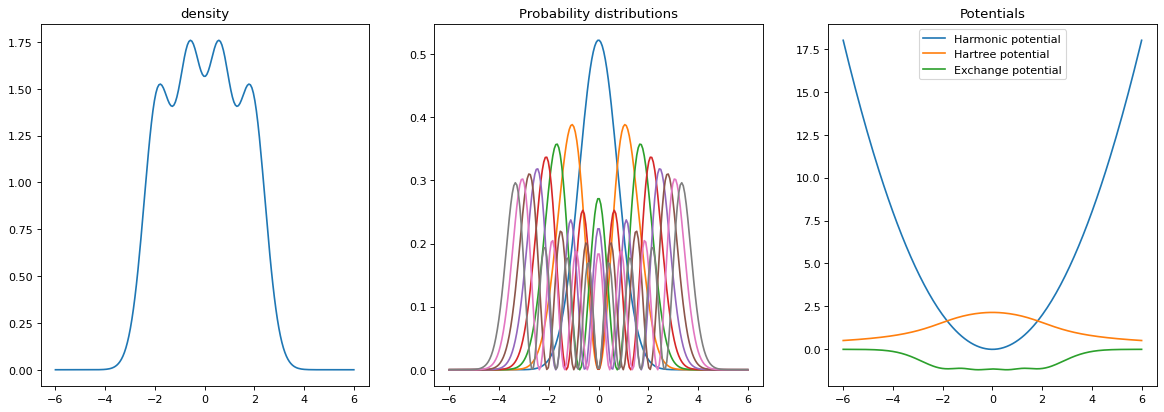

Iteration: 2, Exchange E: -6.678, Hartree/coulumb E: 11.576


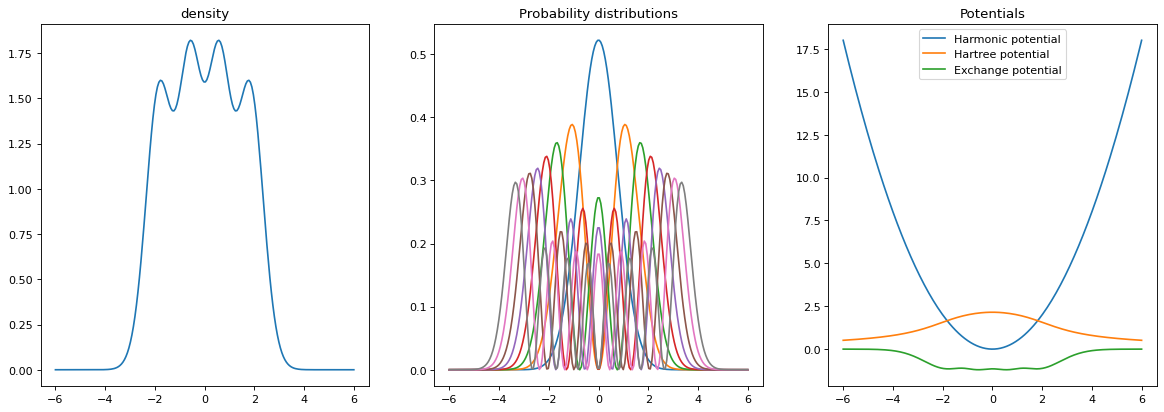

Iteration: 3, Exchange E: -6.689, Hartree/coulumb E: 11.576
Iteration: 4, Exchange E: -6.691, Hartree/coulumb E: 11.576
Iteration: 5, Exchange E: -6.691, Hartree/coulumb E: 11.576
Iteration: 6, Exchange E: -6.691, Hartree/coulumb E: 11.576
Iteration: 7, Exchange E: -6.691, Hartree/coulumb E: 11.576
Iteration: 8, Exchange E: -6.691, Hartree/coulumb E: 11.576


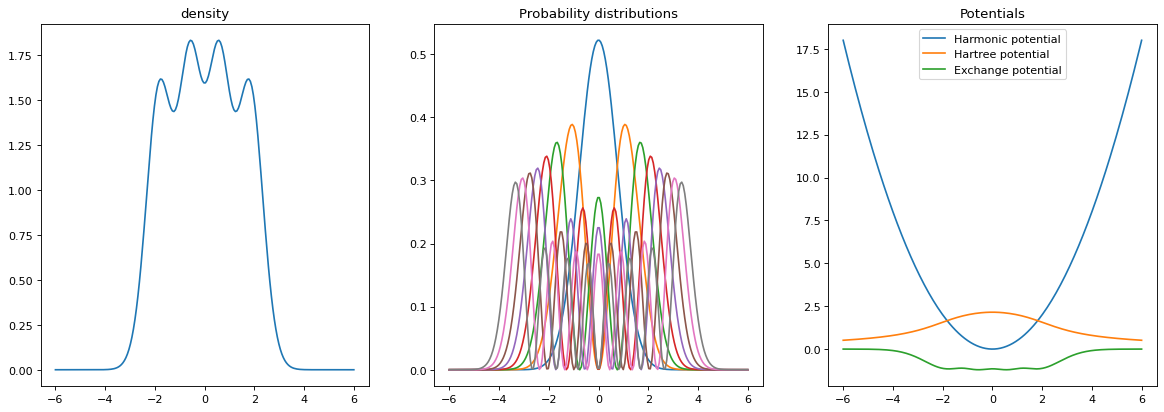

Iteration: 9, Exchange E: -6.691, Hartree/coulumb E: 11.576


In [93]:

attemps = 10
start_x = -6
end_x = 6
num_points = 200
num_electrons = 8
grid_x = np.linspace (start_x,end_x,num_points)
harmonic_pot, harmonic_pot_vec = potential(grid_x)
dft_given_potential(attemps=attemps,grid_x=grid_x, potential_in_points=harmonic_pot, potential_in_points_vec = harmonic_pot_vec, num_electrons=num_electrons, crosssectional_plots = [1,2,8])


In [97]:
def potential_dob(grid_x, x1,x2)->np.array:
    V = np.zeros([grid_x.shape[0], grid_x.shape[0]])

    x_sq_vec_1 = np.square(x-x1)/2
    x_sq_vec_2 = np.square(x-x2)/2  
    pot_value = np.empty([grid_x.shape[0],1])
    for index in range(grid_x.shape[0]):
        pot_value[index] = min(x_sq_vec_1[index],x_sq_vec_2[index])
    x_sq_vec = pot_value
    x_sq = np.diag(x_sq_vec)         # I think no, since the delta x came from the fact that the matrix for T should works as the derivative, here we basically have
    #print(x_sq)                #(A_i)*x_i = x_i^2 where there is no h^2 in denominator 

    return x_sq, x_sq_vec


Iteration: 0, Exchange E: -0.0, Hartree/coulumb E: 11.576
Iteration: 1, Exchange E: -2.297, Hartree/coulumb E: 11.576
Iteration: 2, Exchange E: -2.379, Hartree/coulumb E: 11.576
Iteration: 3, Exchange E: -2.397, Hartree/coulumb E: 11.576
Iteration: 4, Exchange E: -2.402, Hartree/coulumb E: 11.576
Iteration: 5, Exchange E: -2.403, Hartree/coulumb E: 11.576
Iteration: 6, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 7, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 8, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 9, Exchange E: -2.404, Hartree/coulumb E: 11.576


<ipython-input-92-62c50bf4728c>:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


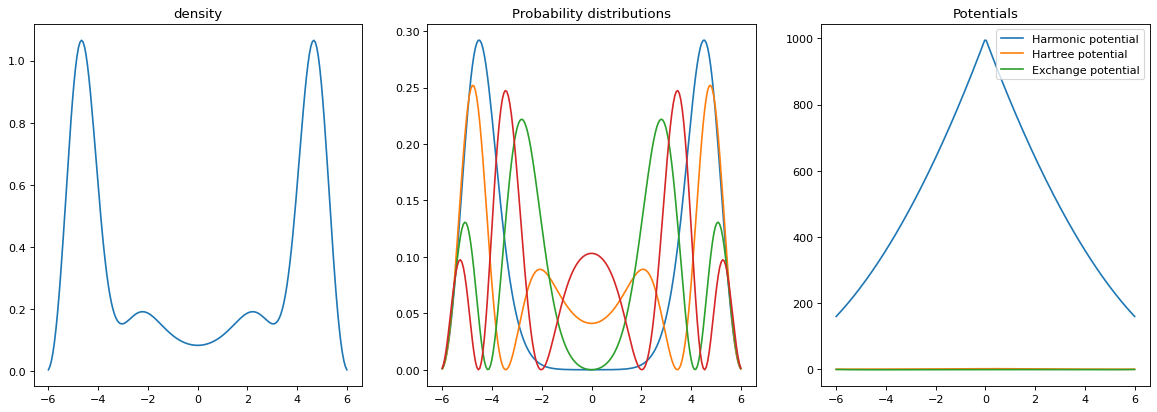

Iteration: 0, Exchange E: -0.0, Hartree/coulumb E: 11.576
Iteration: 1, Exchange E: -2.297, Hartree/coulumb E: 11.576
Iteration: 2, Exchange E: -2.379, Hartree/coulumb E: 11.576
Iteration: 3, Exchange E: -2.397, Hartree/coulumb E: 11.576
Iteration: 4, Exchange E: -2.402, Hartree/coulumb E: 11.576
Iteration: 5, Exchange E: -2.403, Hartree/coulumb E: 11.576
Iteration: 6, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 7, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 8, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 9, Exchange E: -2.404, Hartree/coulumb E: 11.576


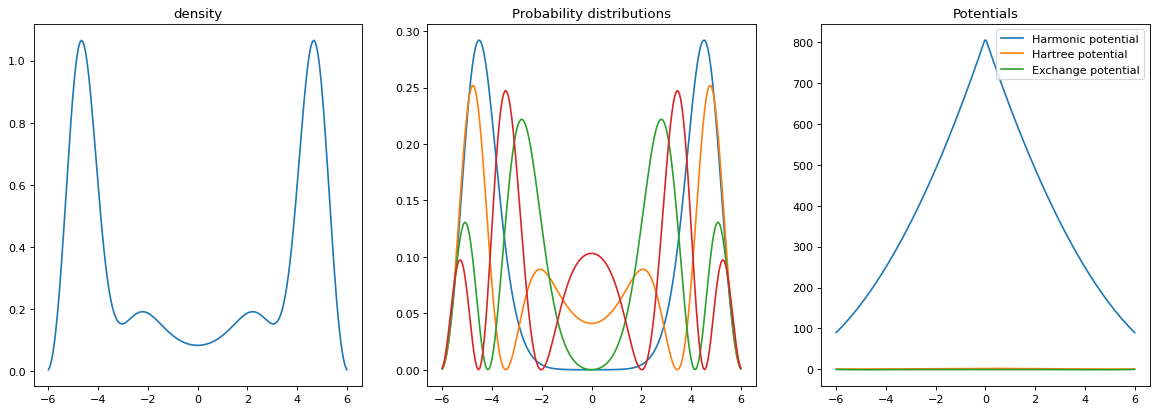

Iteration: 0, Exchange E: -0.0, Hartree/coulumb E: 11.576
Iteration: 1, Exchange E: -2.297, Hartree/coulumb E: 11.576
Iteration: 2, Exchange E: -2.379, Hartree/coulumb E: 11.576
Iteration: 3, Exchange E: -2.397, Hartree/coulumb E: 11.576
Iteration: 4, Exchange E: -2.402, Hartree/coulumb E: 11.576
Iteration: 5, Exchange E: -2.403, Hartree/coulumb E: 11.576
Iteration: 6, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 7, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 8, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 9, Exchange E: -2.404, Hartree/coulumb E: 11.576


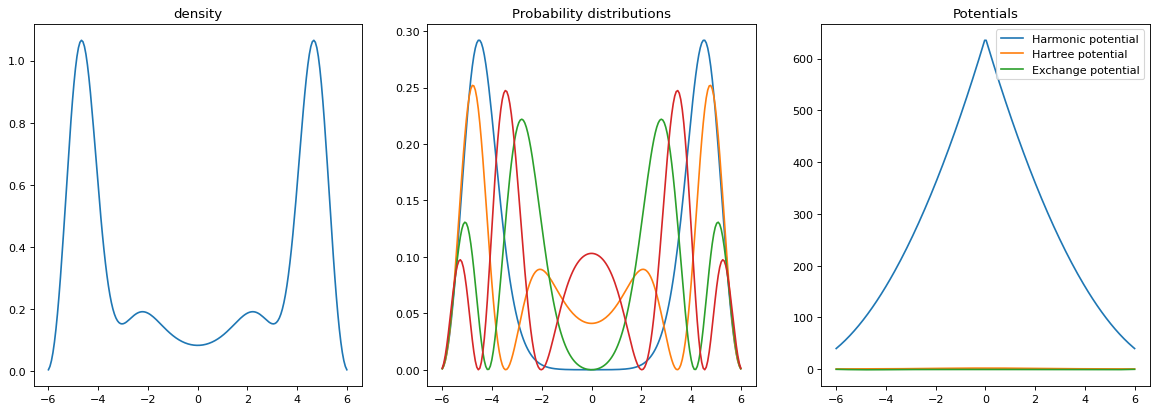

Iteration: 0, Exchange E: -0.0, Hartree/coulumb E: 11.576
Iteration: 1, Exchange E: -2.297, Hartree/coulumb E: 11.576
Iteration: 2, Exchange E: -2.379, Hartree/coulumb E: 11.576
Iteration: 3, Exchange E: -2.397, Hartree/coulumb E: 11.576
Iteration: 4, Exchange E: -2.402, Hartree/coulumb E: 11.576
Iteration: 5, Exchange E: -2.403, Hartree/coulumb E: 11.576
Iteration: 6, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 7, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 8, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 9, Exchange E: -2.404, Hartree/coulumb E: 11.576


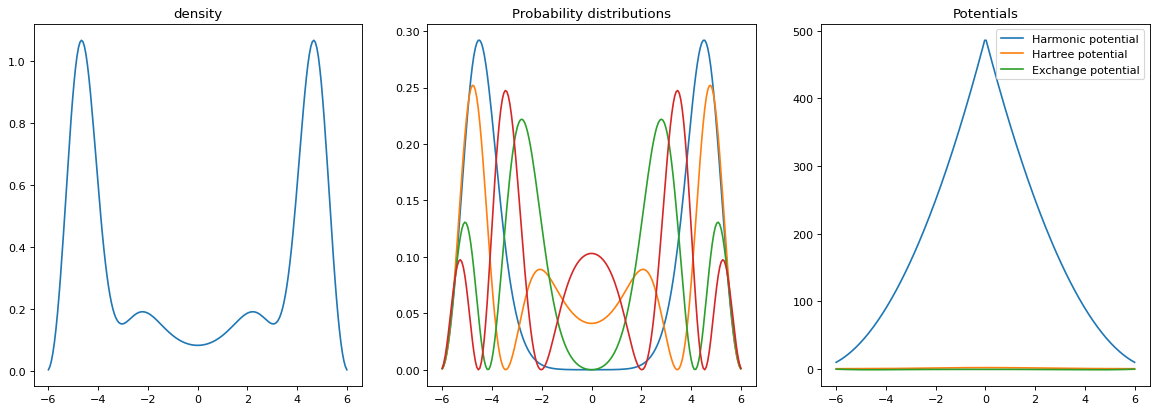

Iteration: 0, Exchange E: -0.0, Hartree/coulumb E: 11.576
Iteration: 1, Exchange E: -2.559, Hartree/coulumb E: 11.576
Iteration: 2, Exchange E: -2.664, Hartree/coulumb E: 11.576
Iteration: 3, Exchange E: -2.688, Hartree/coulumb E: 11.576
Iteration: 4, Exchange E: -2.696, Hartree/coulumb E: 11.576
Iteration: 5, Exchange E: -2.698, Hartree/coulumb E: 11.576
Iteration: 6, Exchange E: -2.699, Hartree/coulumb E: 11.576
Iteration: 7, Exchange E: -2.7, Hartree/coulumb E: 11.576
Iteration: 8, Exchange E: -2.7, Hartree/coulumb E: 11.576
Iteration: 9, Exchange E: -2.7, Hartree/coulumb E: 11.576


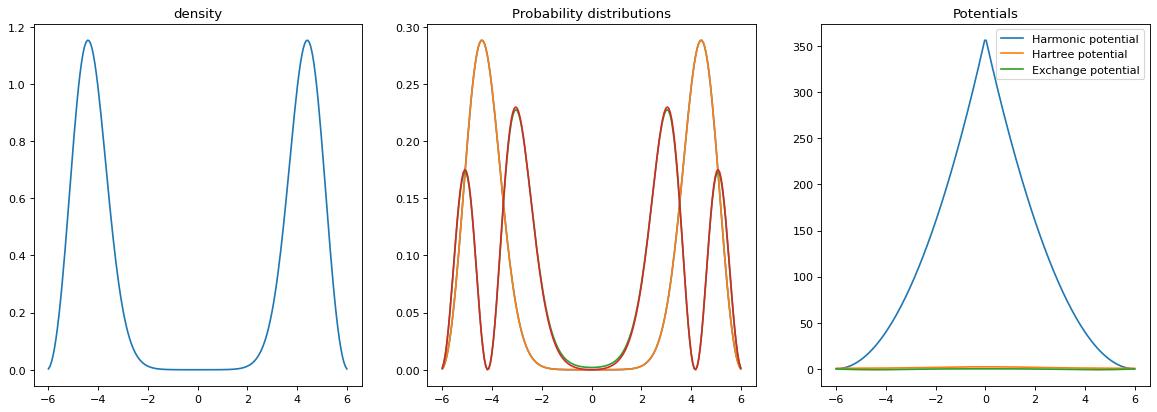

Iteration: 0, Exchange E: -0.0, Hartree/coulumb E: 11.576
Iteration: 1, Exchange E: -2.297, Hartree/coulumb E: 11.576
Iteration: 2, Exchange E: -2.379, Hartree/coulumb E: 11.576
Iteration: 3, Exchange E: -2.397, Hartree/coulumb E: 11.576
Iteration: 4, Exchange E: -2.402, Hartree/coulumb E: 11.576
Iteration: 5, Exchange E: -2.403, Hartree/coulumb E: 11.576
Iteration: 6, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 7, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 8, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 9, Exchange E: -2.404, Hartree/coulumb E: 11.576


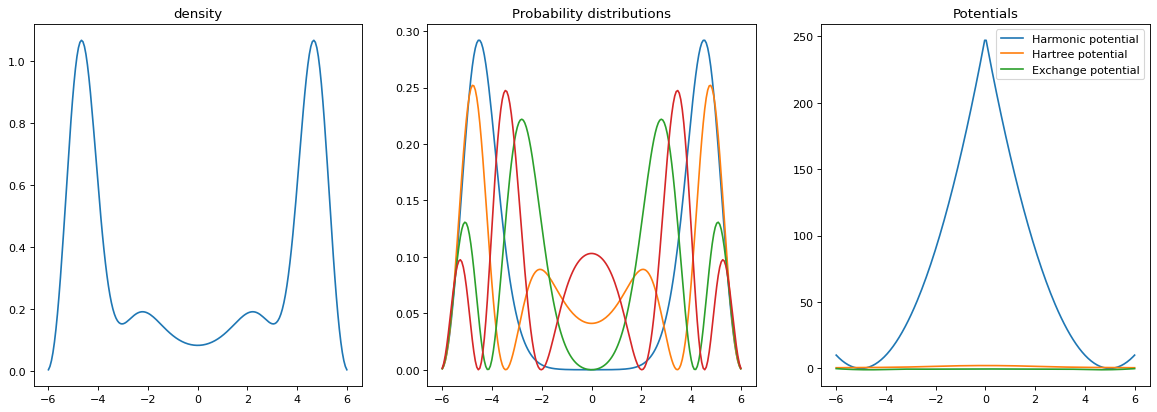

Iteration: 0, Exchange E: -0.0, Hartree/coulumb E: 11.576
Iteration: 1, Exchange E: -2.297, Hartree/coulumb E: 11.576
Iteration: 2, Exchange E: -2.379, Hartree/coulumb E: 11.576
Iteration: 3, Exchange E: -2.397, Hartree/coulumb E: 11.576
Iteration: 4, Exchange E: -2.402, Hartree/coulumb E: 11.576
Iteration: 5, Exchange E: -2.403, Hartree/coulumb E: 11.576
Iteration: 6, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 7, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 8, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 9, Exchange E: -2.404, Hartree/coulumb E: 11.576


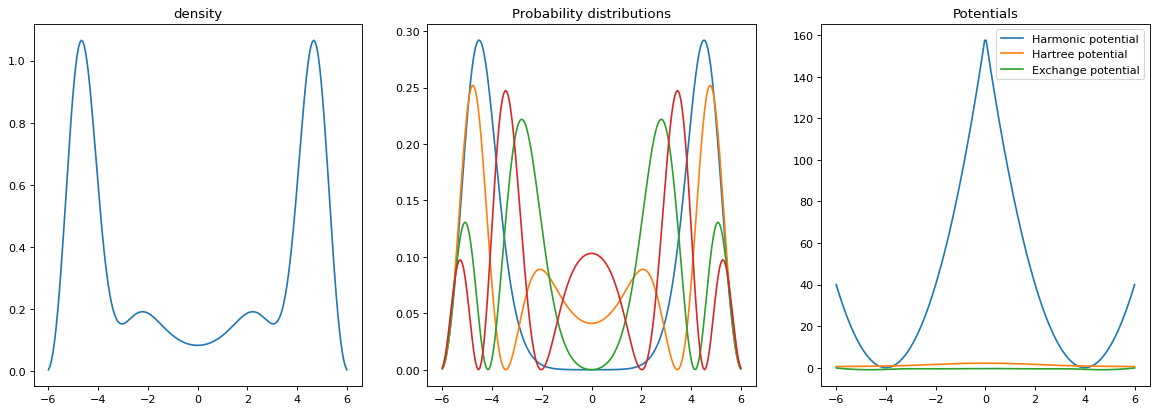

Iteration: 0, Exchange E: -0.0, Hartree/coulumb E: 11.576
Iteration: 1, Exchange E: -2.297, Hartree/coulumb E: 11.576
Iteration: 2, Exchange E: -2.379, Hartree/coulumb E: 11.576
Iteration: 3, Exchange E: -2.397, Hartree/coulumb E: 11.576
Iteration: 4, Exchange E: -2.402, Hartree/coulumb E: 11.576
Iteration: 5, Exchange E: -2.403, Hartree/coulumb E: 11.576
Iteration: 6, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 7, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 8, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 9, Exchange E: -2.404, Hartree/coulumb E: 11.576


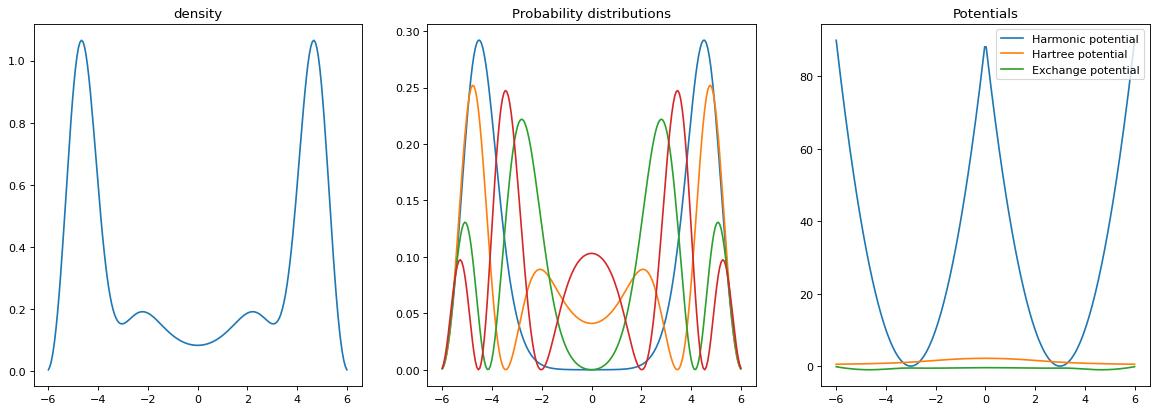

Iteration: 0, Exchange E: -0.0, Hartree/coulumb E: 11.576
Iteration: 1, Exchange E: -2.297, Hartree/coulumb E: 11.576
Iteration: 2, Exchange E: -2.379, Hartree/coulumb E: 11.576
Iteration: 3, Exchange E: -2.397, Hartree/coulumb E: 11.576
Iteration: 4, Exchange E: -2.402, Hartree/coulumb E: 11.576
Iteration: 5, Exchange E: -2.403, Hartree/coulumb E: 11.576
Iteration: 6, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 7, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 8, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 9, Exchange E: -2.404, Hartree/coulumb E: 11.576


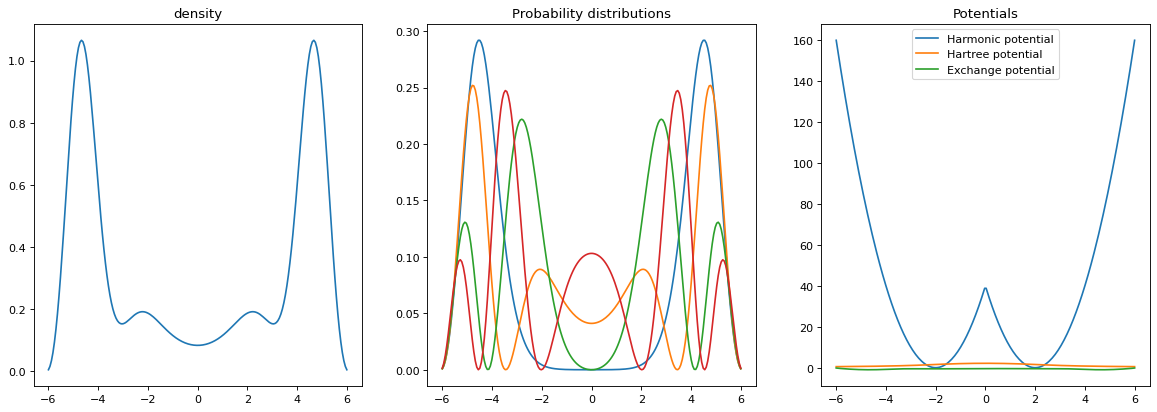

Iteration: 0, Exchange E: -0.0, Hartree/coulumb E: 11.576
Iteration: 1, Exchange E: -2.297, Hartree/coulumb E: 11.576
Iteration: 2, Exchange E: -2.379, Hartree/coulumb E: 11.576
Iteration: 3, Exchange E: -2.397, Hartree/coulumb E: 11.576
Iteration: 4, Exchange E: -2.402, Hartree/coulumb E: 11.576
Iteration: 5, Exchange E: -2.403, Hartree/coulumb E: 11.576
Iteration: 6, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 7, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 8, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 9, Exchange E: -2.404, Hartree/coulumb E: 11.576


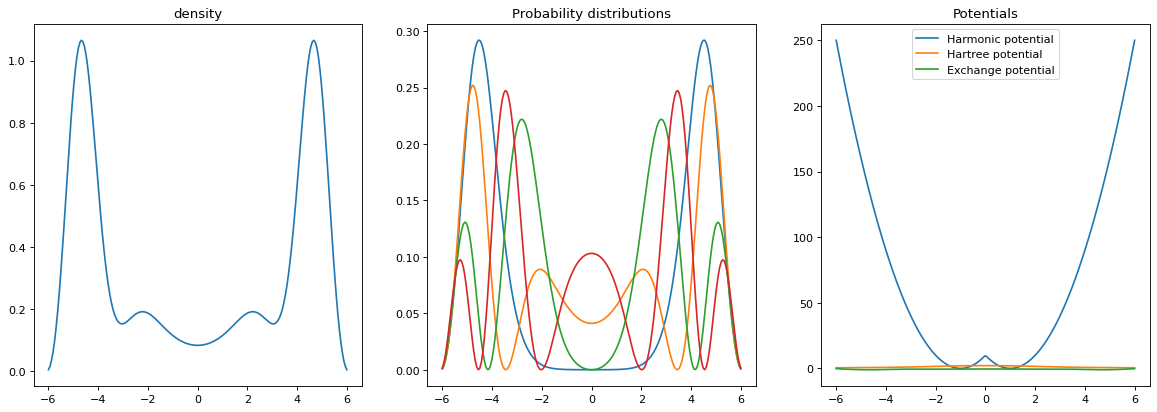

Iteration: 0, Exchange E: -0.0, Hartree/coulumb E: 11.576
Iteration: 1, Exchange E: -2.297, Hartree/coulumb E: 11.576
Iteration: 2, Exchange E: -2.379, Hartree/coulumb E: 11.576
Iteration: 3, Exchange E: -2.397, Hartree/coulumb E: 11.576
Iteration: 4, Exchange E: -2.402, Hartree/coulumb E: 11.576
Iteration: 5, Exchange E: -2.403, Hartree/coulumb E: 11.576
Iteration: 6, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 7, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 8, Exchange E: -2.404, Hartree/coulumb E: 11.576
Iteration: 9, Exchange E: -2.404, Hartree/coulumb E: 11.576


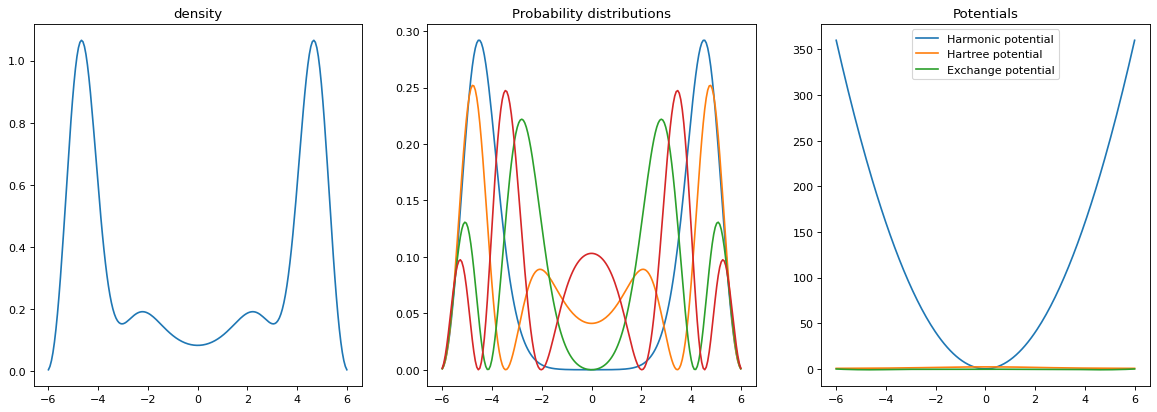

In [106]:
attemps = 10
start_x = -6
end_x = 6
num_points = 200
num_electrons = 4
grid_xx = np.linspace (-6,6,200)
i = 10
while i >=0:
    x_sq, x_sq_vec = potential_dob(grid_x=grid_xx, x1=-i, x2=i)
    dft_given_potential(attemps=attemps,grid_x=grid_xx, potential_in_points=x_sq, potential_in_points_vec = x_sq_vec, num_electrons=num_electrons, crosssectional_plots = [9])
    i-=1